# Lecture 5: Nested Logit

In this lecture we will introduce the nested logit model, the most popular of the extensions or generalizations of the multinomial logit. It has to do with dealing with shortcomings of the Independece of Irrelevant Alternatives property of the multinomial logit. The assumptions if IIA can become a problem when it does not hold in practice or when if we cannot speficy a correct model so that IIA holds. The nested logit allows for 'groups of alternative' that satisfy IIA within themselves.


In this lecture, we will see:

 * The problems/limitations of the multinomial logit when IIA does not hold for the specified model .
 * A modification of the multinomial to accomodate for some of these limitation.
 * Interpretations of the Nested Logit: Probabilistic and Mathematical.

---
---

# Recap of Indepedence of Irrelevant Alternatives


We learned in Lecture 4 about a 'desirable property' in choice modelling (and social sciences at large). It is called 'pairwise independence' or independence of irrelevant alternatives (IIA). It states that the preference among two alternatives should not be modified by the presence of a third.
If if prefer lemon icecream rather than chocolate icecream, it should not happen that  being allowed to choose between lemon, chocolate and vanilla makes me change my the preference from chocolate to lemon.

In choice modelling, the IIA property is formalized as the ratio of choice probabilities must remain constant:

For any choice set $X$, measured attributes $s$ and alternatives $a, b$ of $X$

$$P(a | s, \{a,b\})P(b | s, X) = P(b, | s, \{a,b\})P(a | s, X)$$

The notation $P(a | s, \{a,b\})$ stands for: the choice probability of alternative $a$ with attributes $s$ when the choice set is $\{a,b\}$,

We can write a bit more informally, when the choice probabilities are nonzero as:

$$ \frac{P( a | \{a,b\})}{P(b | \{a,b\})} = \frac{P(a | X)}{P(b | X)}$$

And here it is clear what it is called the 'constant odds', the odds of any two alternatives do not change when we modify the choice set.


The **multinomial logit model** can be nicely derived from the IIA property and some basic assumptions on probabilities (the have to sum 1, greater than 0) and linear log odds.

---
---

# Recap of problems with IIA.

A possible problem that might arise with multinomial logit is illustrated by the so called red bus / blue bus paradox.

In a transport mode choice, individuals choose among car and a red bus.
The choice probabilities are 67% car 33% bus. The car is preferred to the red bus.

 We now introduce a blue bus in the choice set. We can argue that the utilities of red bus and blue bus are the same, since the bus color should not affect utility.
 The multinomial logit model would therefore produce the following choice probabilities in the new situation: 50% car, 25% red bus, 25% blue bus. This is, starting from some utilities for car and red bus, say log(2) and log(1) respectively, we applying the formula softmax from the observed utilites for the new setting car (log (2)), red bus (log(1)) and blue bus (log(1)), we reach the 50% car, 25% red bus, 25% blue bus choice probabilities.

  We see that the ratio between car and red bus in the new setting is the same as when there was the 66% / 33% split.

 **However,** 'common sense' dictates (or argues) that the probability of car should not be affected when introducing the blue bus, that the split 67% car /16.5% red bus / 16.5% blue-bus makes more sense. This is, the fact that we introduce a bus of another color should not affect the probability of whether we go by car or not, it seems absurd.

Though this scenario seems to suggest that the multinomial logit is heavilty flawed, we saw that a **properly specified** multinomial logit could produce the more logical scenario, if the model is prepared to accomodate for that change, for example by better capturing properties of the choice situation (frequency of buses and so on).

However, this 'correct' specification might be difficult to find. It might happen that we do not know how to properly specify the 'right' multinomial logit model, for example because of lack of access to meaningful variables. In some situations, **we might have the information or previous knowledge that red bus and blue bus are 'similar' and show not draw probabilities from car, only from each other. This is what we can do with the nested logit, we will be able to specify a 'similarity' or 'grouping' structure across the alternatives.**

**The nested logit is a *generalization* of the multinomial the becomes useful when there is a grouping structure among alternatives that we cannot capture with the simpler multinomial logit.**


---
---

# The nests structure

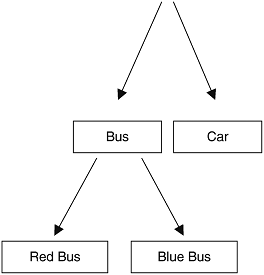

---
---

# The intuition behind the nested logit


The main idea is to understand the decision process at 'two levels'.
In the case of the red bus/blue bus it would be:
 1. First, the choice between car
and bus **(of any type)**. $P(bus | \{car, bus\})$
  *  We can think of choosing between to alternatives car and bus, with bus groups together both read bus and blue bus. We would apply the multinomial logit for that scenario.
 2. Then, if car is chosen, we compute the choice probabilities between red bus and blue bus. $P(redbus | \{redbus, bluebus\})$
 3. The probability for red bus is computed by the product of the probabilites at steps 1 and 2.

The complete scenario could be described as:

$$P( redbus) = P(bus | \{car, bus\}) P( redbus | \{redbus, bluebus\})$$

$$P( bluebus) = P(bus | \{car, bus\}) P( bluebus | \{redbus, bluebus\})$$

$$P(car) = P(bus | \{car, bus\})$$

And that would be it!

What remains is expressing this idea in a mathematical way, using expressions similar to the multinomial logit.

**Note that the fact that we are explaining this idea as a sequence of choices does not imply that the actual decisions happen sequentially.**


---
---

# Intuition behind the nested logit: Basic implementation

We can implement the idea if we already understand the 'humble' multinomial logit.For example, given a dataset, we could estimate two multinomial logits, one at the 'upper level' of the hierarchy and another at the 'bottom level' of the hierarchy.

In the example of the car, redbus, bluebus, we gather the data as three alternatives with three different set of attributes.

Instead of going for a direct 'full' multinomial logit, we will estimate two separate models by 'cleaning' the dataset in two different ways. A first model that calculates choice probabilities between car and bus of any type. We would 'group up' the red bus and blue bus alternatives as it was only one alternative, ignoring color. Then
we could estimate a second multinomial logit on the subset of data (the rows in the dataset) when the choices are red bus or blue bus.

The limitation is that this is an inefficient way of estimating the model, we are not using the data as well as we could, we are 'discarding information' in some way.

This is why the nested logit becomes useful, it is a slightly better way of estimating the underlying idea. The nested logit also provides a 'smooth' transition from this extreme 'separate' models to a mix between the two, this is, when the nesting structure is not that strong, the grouping is not 'crisp' but 'fuzzy'.

---
---

# The nested logit: Utility specification


We show it first show 'one way' of explaining the nested logit:
 * First, the probabilistic or 'fundamental' or 'utility' way os understanding the nested logit.
 * The we will explain it in the analogous to the 'squashing' interpretation.


A the leaf level of the tree, we can understand utilitities as.

Notation take from the reference book Applied Choice Analysis (chapter 4.6).

Note that the notation is for a two level nest, and it is already **quite complicated**. If we had more levels the notation would be even more cumbersome, this is an example (IMHO) where the mathematical notation is not that helpful, expressing the idea in words or code is easier. *So keep in mind that following the notiation might take a bit of effort, the intuition in much simpler!*

The basic probabilistic interpretation of the nested logit is a Random Utility Model that considers:
 * Differences in scale in the random component.
 * Dependency for the random component across alternatives within the same nest.

This is, as opposed to the multinomial logit, for which the random component is independent and identically distributed.

In the MNL, the distribution is the Gumbel or Extreme Value Type 1, in the nested logit, the distribution is the Generalized Extreme Value.

The specification for the nested logit for the utility follows the formula:

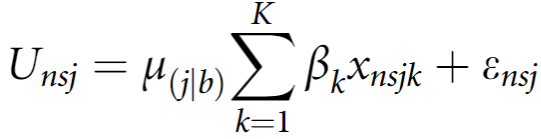

Where:
* $\mu$ is a scale parameter. **This introducesDifferences in scales**
* $j$ represents the alternative
* $b$ the branch
* $k$ enumerates the alternative.
* $s$ stands for choice situation (it can be safely ignored).
* $\varepsilon_{nsj}$ is the random component. **These error components are not independent, there is dependence among the random components.**




---
---

# Nested logit: Utilities at nest level
To compute the choice probabilities from the utility, we will do it in a similar fashion to the MNL, but the expression is a bit more complicated.

We will do it in two parts, 'bottom up'. First, the expression on how to compute the utility within each nest.

The expression calculates the utility for the nest level.

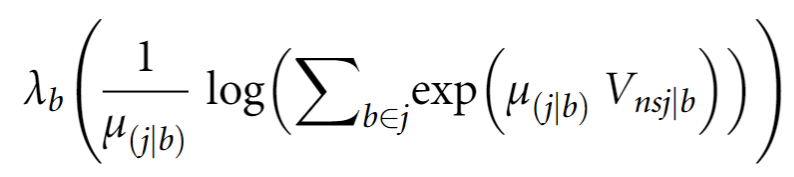

Where the $\lambda$ is a factor that indicates how 'similar' the alternatives in the nest are. $\lambda$s are in the range (0,1), $\lambda$s close to 0 indicate very similar alternatives withing each nest. (We will see later a clear view of this).

For all $\lambda =1$  the model can be reduced to the multinomial logit. **The result of the  above expression calculates the utilities at nest levels, for each branch/group.**

# Nested logit: Choice probabilities

The idea behind the choice probabilities of the nested logit comes from the intuition of the product of the probabilities within a nest and across nests.
It is the product of two multinomial logit expressions.
The result, put together is quite complicated... If we have more levels to the nests, we would be adding more and more terms.

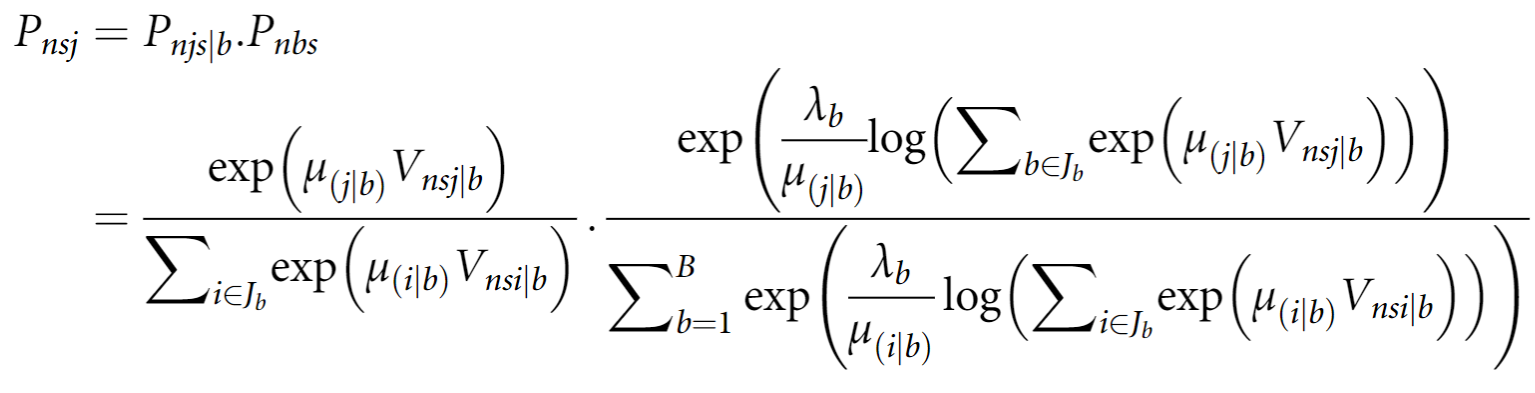

---
---


# Another explanation

In my opinion, a simple way of understanding the nested logit is to go back to what we want to do.

We we make the two-step process at the branch level, what we want to do is to substitute **all utilities within the nest** by the **maximum utility within the nest**.

This is what is the $\log$ is doing in the formula. It comes from the **logsumexp** function, that attempts to calculate the maximum of a vector, but in a smooth fashion.

 The analogy is in the spirit of the softmax squashing: We want to express the idea of the utility for a nest as the maximum utility for all alternatives within that nest, but we cannot express this in a mathematical way that would allow us to calculate the coefficients easily . So we introduce an mathematical approximation of the 'max' function that has derivatives so we can optimize its coefficients.

  The bonus is that the coefficient that controls the smoothness of the max approximation (the $\lambda$) can be tuned to go from an almost pure maxfunction to just the average. We can find this parameter from the data so we can see how strong the nested structure is.


---
---

# Practical considerations

When we estimate a nested logit:
  * We have to specify the nest structure ourselves, it is our responsibility. How do we know the nest structure.
  * The values of the $\lambda$s for each nest can be estimated from the data (even though it is not easy).

If we have data to estimate the nest the similarities within each nest, this means that we also have the data to estimate a multinomial logit directly. In our red bus/ blue bus example, we would be already observing the more logical or common sense choice probabilities in the data. So when the nested logit becomes more useful is when we somehow know about the alternative similarities **before** we have data to estimate what happens when we introduce a new alternative.

$$\text{score} = a_1 + a_2 \cdot \text{major} + a_3 \cdot \text{hours} + a_4 \cdot \text{major} \cdot \text{hours} + e$$

当是major的话, major = 1, 那么式子是

\begin{align*}
\text{score} &= a_1 + a_2 + a_3 \cdot \text{hours} + a_4  \cdot \text{hours} + e \\
&= (a_1 + a_2) + (a_3 + a_4) \cdot \text{hours} + e \\
\end{align*}

当不是major的话, major = 0, 那么式子是

$$\text{score} = a_1 + a_3 \cdot \text{hours} + e$$



所以 $a_2 > 0$，$a_4 < 0$

### rv: random variable

The average error: $\bar{e} = \frac{1}{n} \sum_{i=1}^n e_i$

\begin{align*}
\text{OLS:} \ \min_{\beta_0, \beta_1} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 \\
\end{align*}

对$\beta_1$进行求导，得到$\sum_{i=1}^{n}e_i X_i = 0$

对$\beta_0$进行求导，得到$\sum_{i=1}^{n}e_i = 0 \rightarrow \frac{1}{n} \sum_{i=1}^{n}e_i = 0$

\begin{align*}
\text{OLS:} \ \min_{\beta_0, \beta_1} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i})^2 \\
\end{align*}

股票超额 = a + b * 市场超额 + e

\begin{align*}
H_0:& \beta_1 = 0 \\
H_1:& \beta_1 \neq 0 \\
\end{align*}

From the regression table, we could fount that the p value of GMdensity is 0.005, which is less than 0.05. So we could reject the null hypothesis, which means that the GMdensity is significant at the 95% confidence.



\begin{align*}
CI &= \hat{\beta_1} +- t \cdot SE(\hat{\beta_1}) \\
&= 82.4488 +- 2.71 \cdot 27.581 \\
&= solution
\end{align*}

\begin{align*}
\text{LAD:} \ \min_{\beta_0, \beta_1} \sum_{i=1}^n |y_i - \beta_0 - \beta_1 x_{i}| \\
\end{align*}